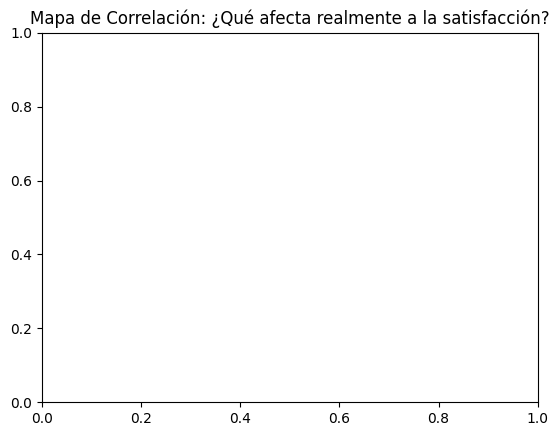

¡ERROR! No encuentro el archivo 'train.csv'. Asegúrate de subirlo al entorno.


FileNotFoundError: [Errno 2] No such file or directory: 'data/train.csv'

In [3]:
plt.title("Mapa de Correlación: ¿Qué afecta realmente a la satisfacción?")
plt.show()

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- 1. CARGAR DATOS (Corrección de ruta) ---
try:
    # Intenta cargar asumiendo que el archivo está en la misma carpeta que el notebook
    df = pd.read_csv("train.csv") 
except FileNotFoundError:
    # Si falla, intenta con la carpeta 'data/' (por si acaso tienes esa estructura)
    try:
        df = pd.read_csv("data/train.csv")
    except FileNotFoundError:
        print("¡ERROR! No encuentro el archivo 'train.csv'. Asegúrate de subirlo al entorno.")
        # Detenemos la ejecución si no hay datos
        raise

# --- 2. MAPEO DE DATOS (Feature Engineering) ---
mapa_satisfaccion = {'neutral or dissatisfied': 0, 'satisfied': 1}
mapa_clase = {'Eco': 0, 'Eco Plus': 1, 'Business': 2}
mapa_viaje = {'Personal Travel': 0, 'Business travel': 1}

# Aplicamos los mapeos
df['satisfaction'] = df['satisfaction'].map(mapa_satisfaccion)
df['Class'] = df['Class'].map(mapa_clase)
df['Type of Travel'] = df['Type of Travel'].map(mapa_viaje)

# --- 3. ELIMINAR COLUMNAS (Decisión de Negocio/Técnica) ---
# 'Unnamed: 0' y 'id': Son ruido, no aportan valor predictivo.
# 'Departure Delay': Se elimina porque está muy correlacionada con 'Arrival Delay'.
# Nos quedamos con Arrival porque llegar tarde duele más al cliente que salir tarde.
cols_a_eliminar = ['Unnamed: 0', 'id', 'Departure Delay in Minutes']
df_limpio = df.drop(columns=cols_a_eliminar, errors='ignore')

# --- 4. TRATAR NULOS ---
# Imputamos la media en el retraso de llegada
df_limpio['Arrival Delay in Minutes'] = df_limpio['Arrival Delay in Minutes'].fillna(df_limpio['Arrival Delay in Minutes'].mean())

# --- 5. GENERAR HEATMAP (Para decidir sobre Gender y Gate Location) ---
plt.figure(figsize=(16, 12))
sns.heatmap(
    df_limpio.corr(numeric_only=True), 
    annot=True, 
    fmt=".2f", 
    cmap="RdBu_r", 
    center=0
)
plt.title("Mapa de Correlación: Variables vs Satisfacción")
plt.show()